## Using polynomial Model and Latter will use classfication method

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## We load the Dataset, explore it and perform some data cleansing

In [3]:
fish = pd.read_csv('Fish.csv')

In [4]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish.shape

(159, 7)

In [8]:
fish.isnull().sum() # the data is cleaning

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## Now we move to EDA

<AxesSubplot:>

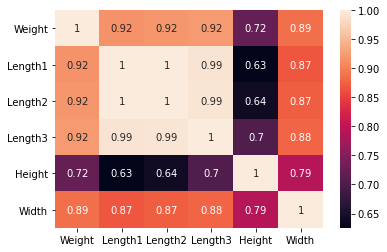

In [10]:
sns.heatmap(fish.corr(), annot=True)

In [19]:
x = fish.iloc[:,2:5] 
y = fish.iloc[:,1:2]

In [22]:
X = x.values
Y = y.values
# After Backward Elimination. We Eliminate Length1 and Length3
x = fish.iloc[:,3:4]

## Split Variables (train-split)

In [25]:
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=0)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [28]:
import statsmodels.api  as sm 
X = np.append(arr = np.ones((159,1)).astype(int), values=fish.iloc[:,:-1], axis=1 )
X_l = fish.iloc[:,[2,3,4]].values
r_ols = sm.OLS(endog = fish.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Width   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1992.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                   4.20e-124
Time:                        18:34:57   Log-Likelihood:                         -180.68
No. Observations:                 159   AIC:                                      367.4
Df Residuals:                     156   BIC:                                      376.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'Weight Prediction')

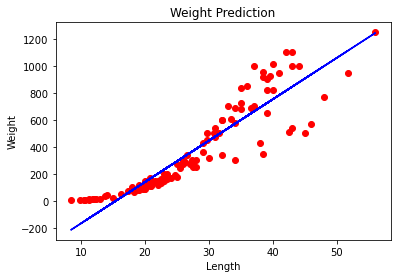

In [29]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,lin_reg.predict(X_train),color = 'blue')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Weight Prediction')

## Evaluation

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, lin_reg.predict(X_test))

0.8781224005521975

In [32]:
x_1 = fish[['Length2']]
y_1 = fish[['Weight']]
X_1 = x_1.values
Y_1 = y_1.values

In [33]:
from sklearn.linear_model import LinearRegression 
lin_reg2 = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_1.values)
lin_reg2.fit(x_poly,y_1)

LinearRegression()

Text(0.5, 1.0, 'Weight Prediction')

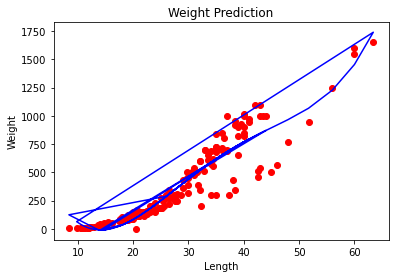

In [34]:
plt.scatter(x_1,y_1,color = 'red')
plt.plot(x_1,lin_reg2.predict(poly_reg.fit_transform(x_1)),color='blue')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Weight Prediction')